## Assignment 1 

This assignment is based on the video discussed in module 1.

John Rauser ( 2014). Statistics Without the Agonizing Pain. Strata Hadoop 2014. Retrieved from https://www.youtube.com/watch?v=5Dnw46eC-0o

(Source: https://www.youtube.com/watch?v=5Dnw46eC-0o )




 
  
 

## Learning outcomes

- Use code to work with data
- Calculate basic statistical measures 
- Implement a data simulation by using resampling 


**Question 1**

1. Using the dataset from the video ( _mosquitos_data.csv_) in the folder, write Python code to:

    - Create side-by-side boxplots for the number of mosquitos in each group ( _beer vs water) 
    - What does the graph reveal about the data for both groups?  Is there an association between beer       consumption and attractiveness to mosquitos.
    - Calculate basic statistics measures for each group: Mean, median, standard deviation and explain the numbers.

2. Write code to implement the data simulation demonstrated in the above mentioned video.  Calculate the probability of obtaining the experiment outcome assuming no association between beer consumption.

## Hints

- Use pandas, matplotlib, or seaborn to plot boxplots in Python. 
- Label the graphs wherever applicable e.g, title, legend, units etc.





In [1]:
#your work here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import sklearn.utils


mosquitos = pd.read_csv("mosquitos_data.csv")

# Question 1 

In [2]:
mosquitos.head()

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer


In [3]:
mosquitos.tail()

,Response,Treatment
38,22,Water
39,20,Water
40,24,Water
41,18,Water
42,20,Water


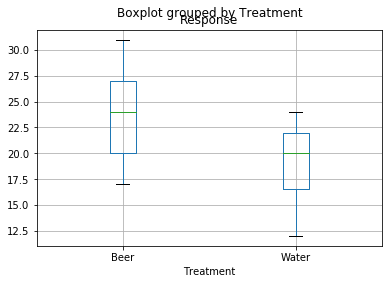

In [4]:
mosquitos.boxplot(column="Response", by="Treatment")
plt.show()

The above boxplot shows that beer is more attractive to mosquitos than water 

In [5]:
mos_beer = mosquitos[mosquitos["Treatment"] == "Beer"]
mos_water = mosquitos[mosquitos["Treatment"] == "Water"]

In [6]:
#Mean, median, standard deviation
print ("Beer mean is: ", mos_beer.mean())
print ("Beer median is: ", mos_beer.median())
print ("Beer standard deviation is: ", mos_beer.std())

Beer mean is:  Response    23.6
dtype: float64
Beer median is:  Response    24.0
dtype: float64
Beer standard deviation is:  Response    4.133199
dtype: float64


68% of the results for the Beer mosquitos occur between 1std of the mean, roughly between the values of 19.46 - 27.73

In [7]:
print ("Water mean is: ", mos_water.mean())
print ("Water median is: ", mos_water.median())
print ("Water standard deviation is: ", mos_water.std())

Water mean is:  Response    19.222222
dtype: float64
Water median is:  Response    20.0
dtype: float64
Water standard deviation is:  Response    3.67112
dtype: float64


68% of the results for the Water mosquitos occur between 1std of the mean, roughly between the values of 15.55 - 22.89

# Question 2

Write code to implement the data simulation demonstrated in the above mentioned video. Calculate the probability of obtaining the experiment outcome assuming no association between beer consumption https://www.youtube.com/watch?v=5Dnw46eC-0o

25 need to be beer, 18 water

In [8]:
#drop Treatment field from df
del mosquitos['Treatment']

df_graph = []   

#Loop through the below 5000 times 
for i in range(5000):
    mosquitos_shuffle = sklearn.utils.shuffle(mosquitos)
    mosquitos_shuffle_beer = mosquitos_shuffle.head(25)
    mosquitos_shuffle_water = mosquitos_shuffle.tail(18)
    diff_means = round(mosquitos_shuffle_beer.mean() - mosquitos_shuffle_water.mean(),1)
    df_graph.append(diff_means)

df_graph = pd.DataFrame(data = df_graph)
df_graph.head()
#df_graph

,Response
0,-1.5
1,0.8
2,-0.9
3,0.7
4,2.5


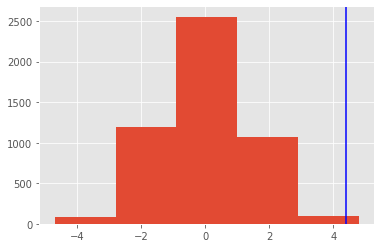

In [9]:
plt.style.use('ggplot')
plt.hist(df_graph['Response'], bins=5)
plt.axvline(x=4.4, color = "blue") #Original difference of means of beer(23.6) - water(19.2)
plt.show()